In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [ ]:
#load dataset
df=pd.read_csv('/content/Stroke_Prediction_Indians.csv')

In [ ]:
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [ ]:
df.shape

(172000, 22)

#***EDA(Explotary Data Analysis):-***

In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       172000 non-null  int64  
 2   Gender                    172000 non-null  object 
 3   Hypertension              172000 non-null  int64  
 4   Heart Disease             172000 non-null  int64  
 5   Ever Married              172000 non-null  int64  
 6   Work Type                 172000 non-null  object 
 7   Residence Type            172000 non-null  object 
 8   Average Glucose Level     172000 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking Status            172000 non-null  object 
 11  Physical Activity         172000 non-null  object 
 12  Dietary Habits            172000 non-null  object 
 13  Alcohol Consumption       172000 non-null  i

In [ ]:
#drop unncessay dataset
df.drop('ID',axis=1,inplace=True)

In [ ]:
#dataset describe
df.describe()

,Age,Hypertension,Heart Disease,Ever Married,Average Glucose Level,BMI,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Stroke Risk Score,Stroke Occurrence
count,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000
mean,54.009826,0.150134,0.100279,0.300965,184.931265,30.012799,0.200169,0.250000,7.500221,0.148948,50.619076,0.099395
std,21.076357,0.357203,0.300373,0.458679,66.314107,11.570356,0.400128,0.433014,2.875179,0.356038,28.906648,0.299193
min,18.000000,0.000000,0.000000,0.000000,70.000000,10.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,127.540000,20.000000,0.000000,0.000000,5.000000,0.000000,26.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,184.760000,30.000000,0.000000,0.000000,7.000000,0.000000,51.000000,0.000000
75%,72.000000,0.000000,0.000000,1.000000,242.440000,40.100000,0.000000,0.250000,10.000000,0.000000,76.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,300.000000,50.000000,1.000000,1.000000,12.000000,1.000000,100.000000,1.000000


In [ ]:
#dataset the  missing values
df.isnull().sum()

,0
Age,0
Gender,0
Hypertension,0
Heart Disease,0
Ever Married,0
Work Type,0
Residence Type,0
Average Glucose Level,0
BMI,0
Smoking Status,0


In [ ]:
#check the duplicated rows
df.duplicated().sum()

0

In [ ]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Work Type', 'Residence Type', 'Smoking Status',
       'Physical Activity', 'Dietary Habits', 'Education Level',
       'Income Level', 'Region'],
      dtype='object')

In [ ]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Hypertension', 'Heart Disease', 'Ever Married',
       'Average Glucose Level', 'BMI', 'Alcohol Consumption', 'Chronic Stress',
       'Sleep Hours', 'Family History of Stroke', 'Stroke Risk Score',
       'Stroke Occurrence'],
      dtype='object')

#***Data visualization:-***

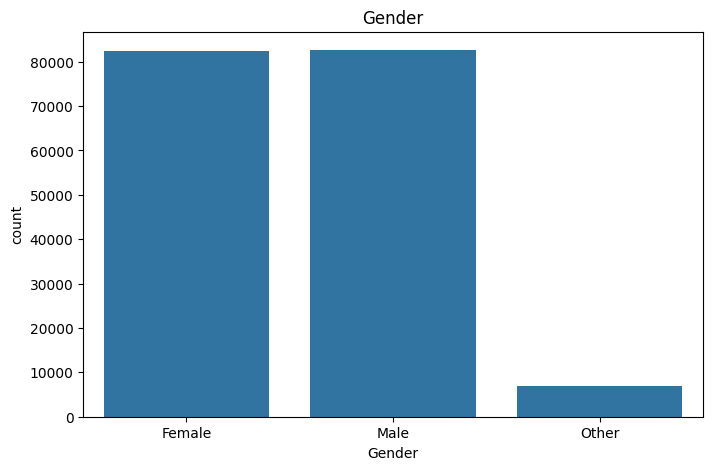

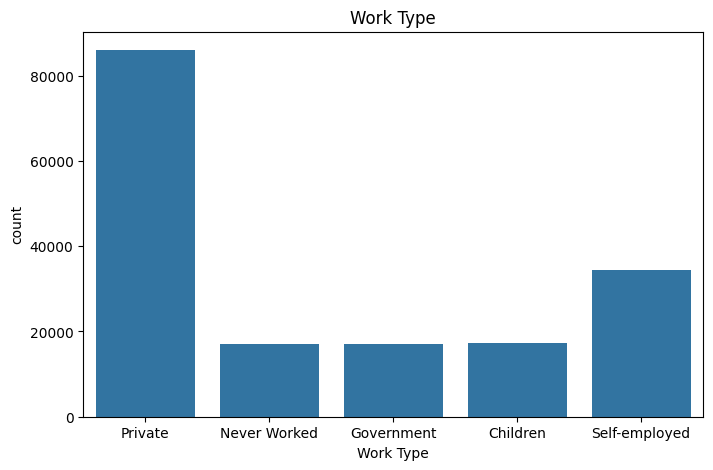

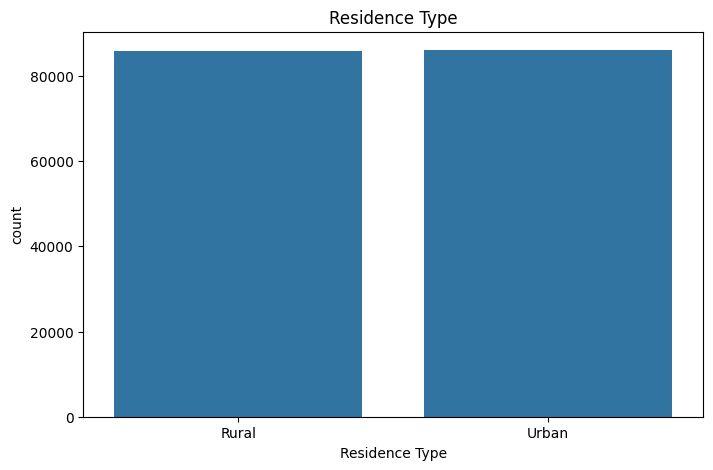

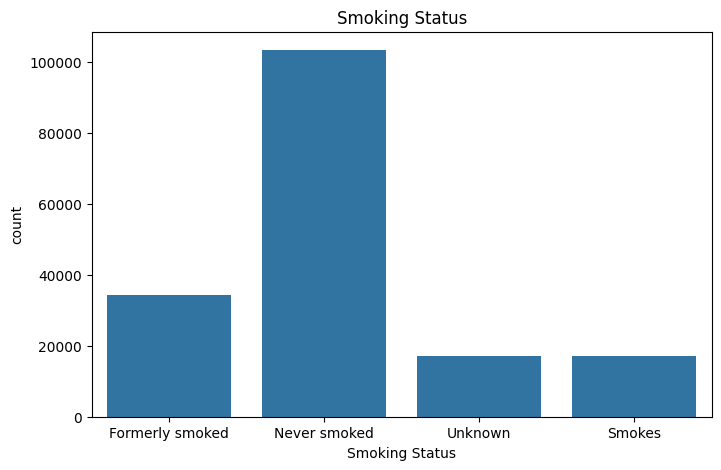

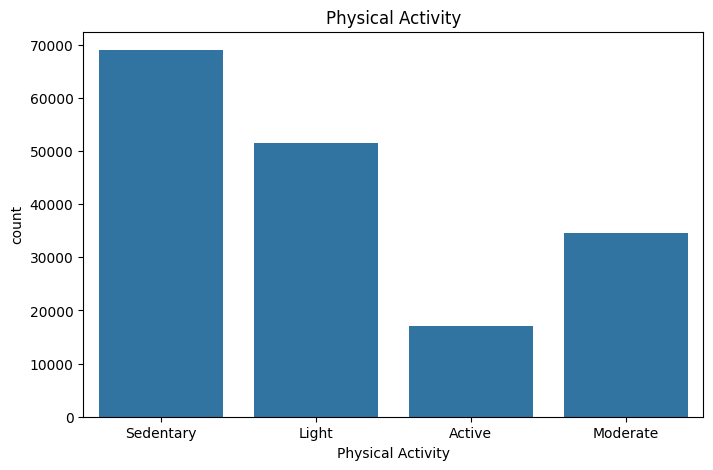

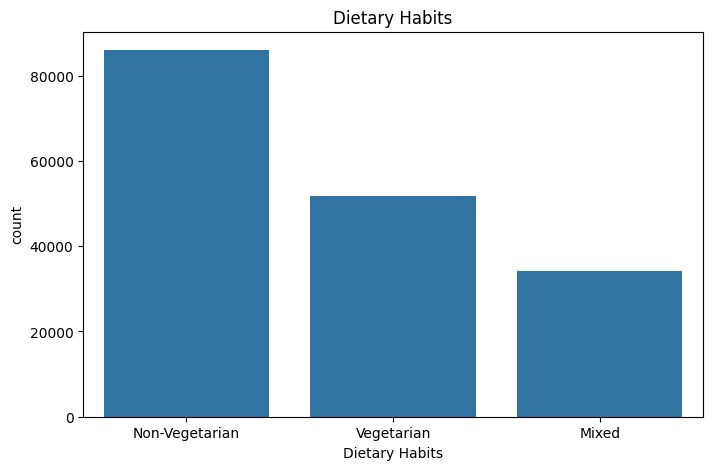

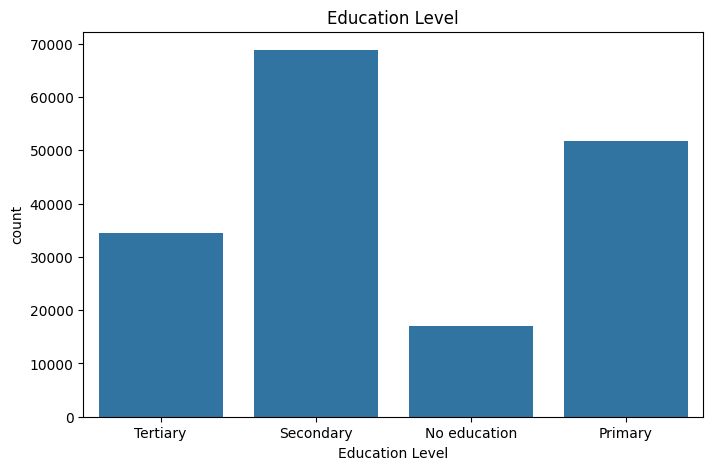

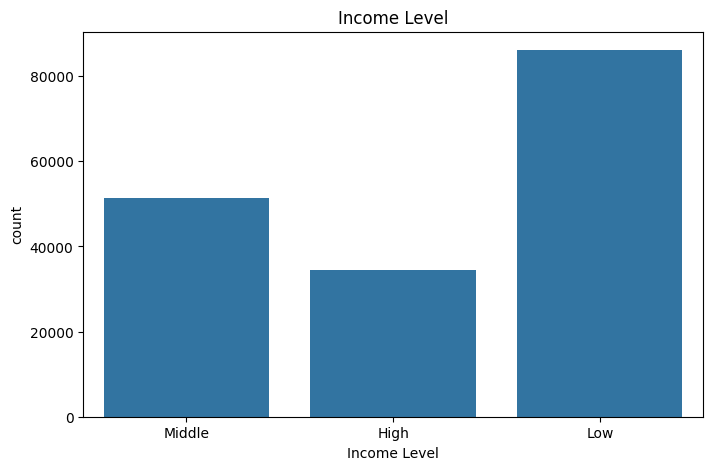

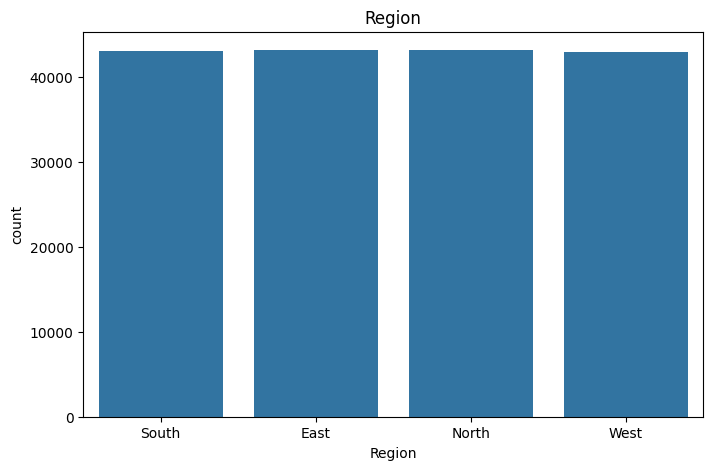

In [ ]:
#data visualization on categorical column
for col in cate_col:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title(col)
  plt.show()

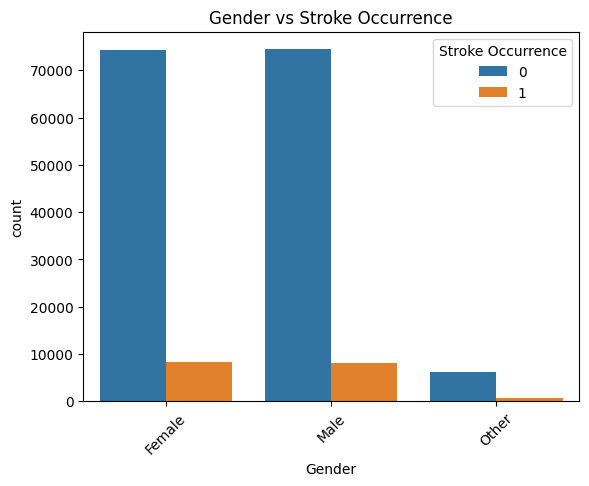

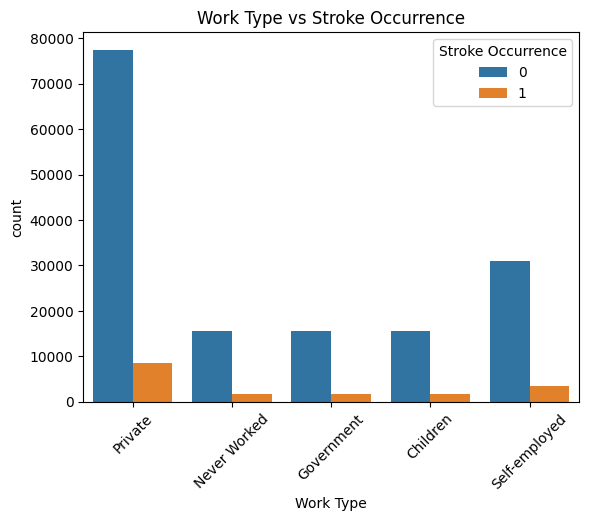

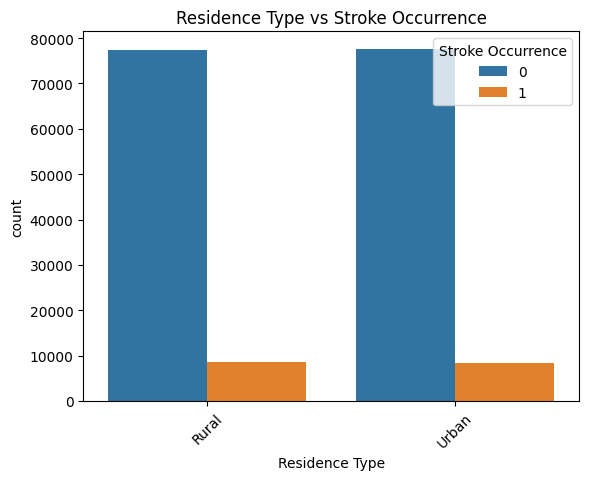

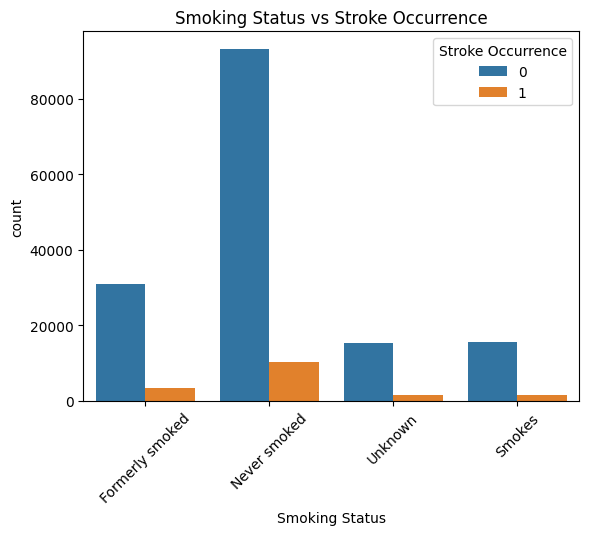

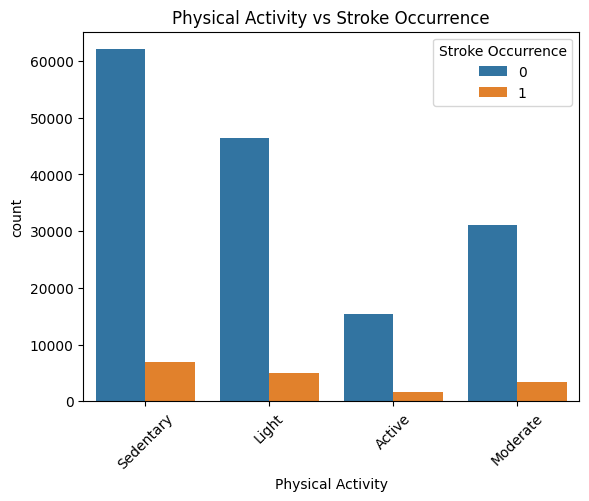

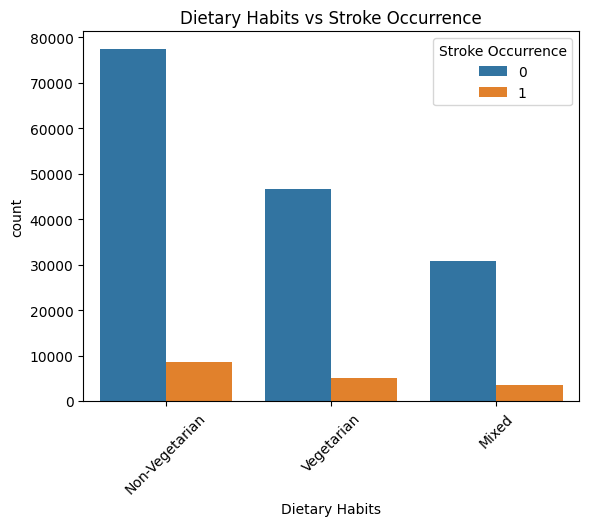

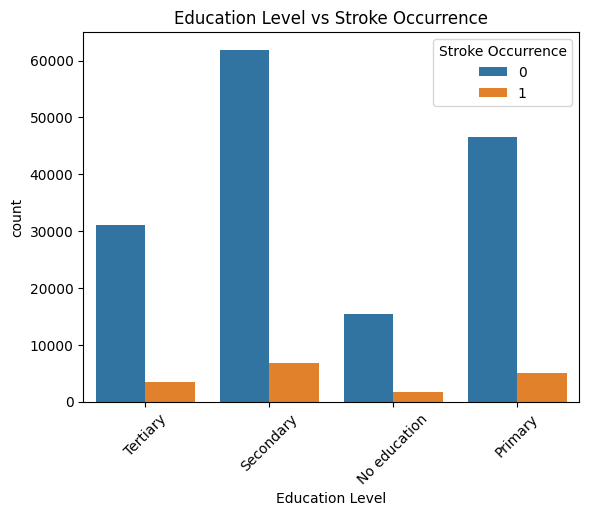

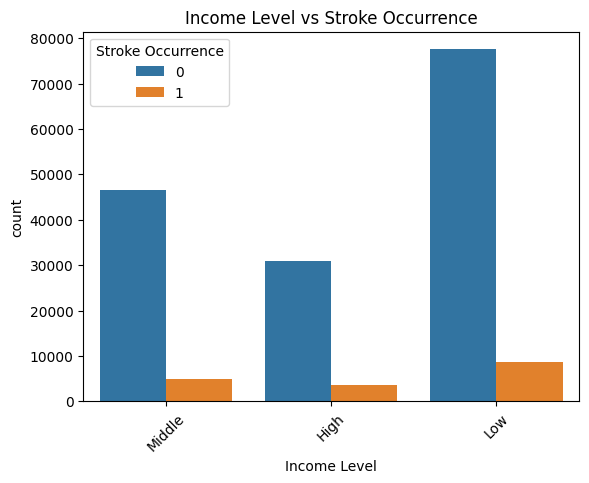

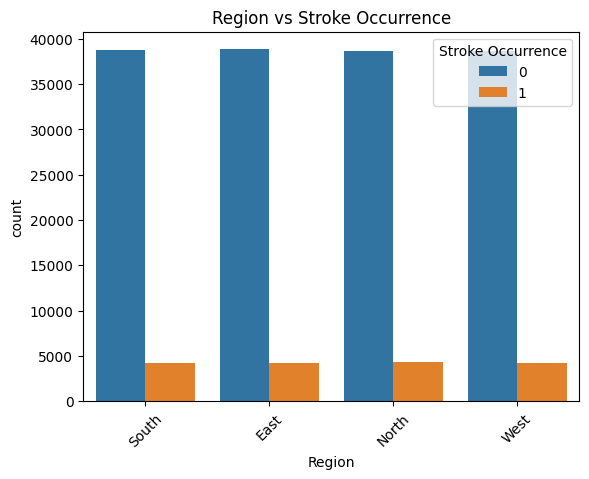

In [ ]:
# Relationship between Stroke Occurrence and Categorical Features
for feature in cate_col:
    sns.countplot(x=feature, hue='Stroke Occurrence', data=df)
    plt.title(f'{feature} vs Stroke Occurrence')
    plt.xticks(rotation=45)
    plt.show()

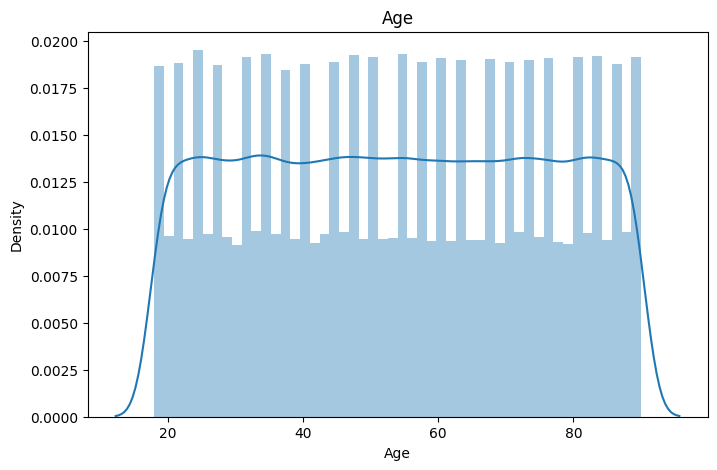

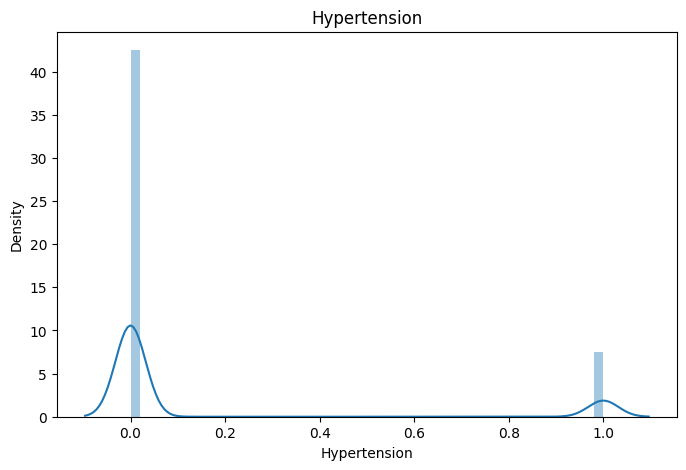

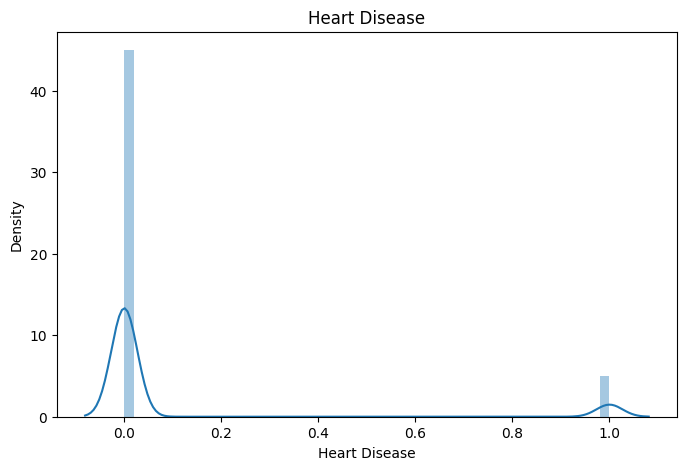

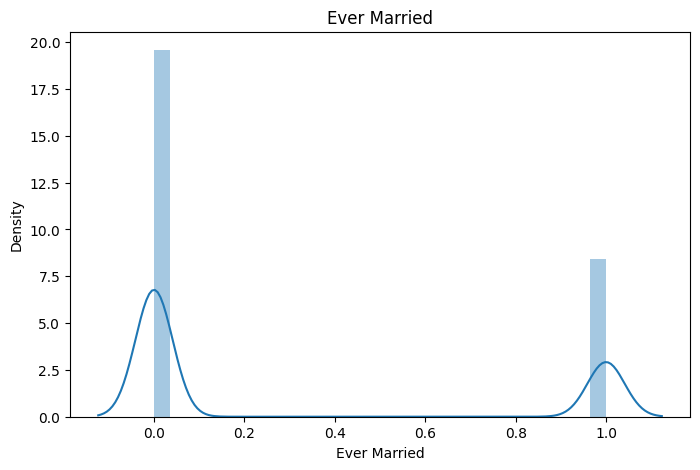

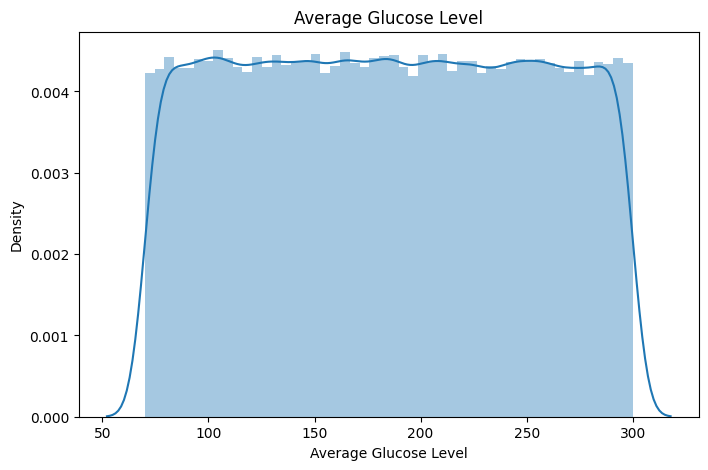

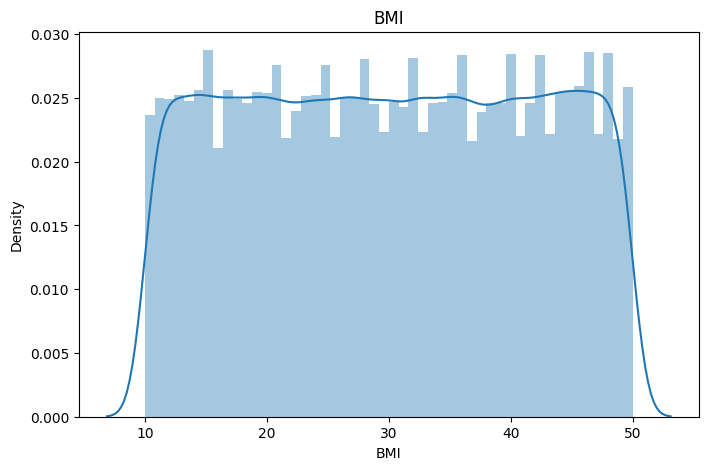

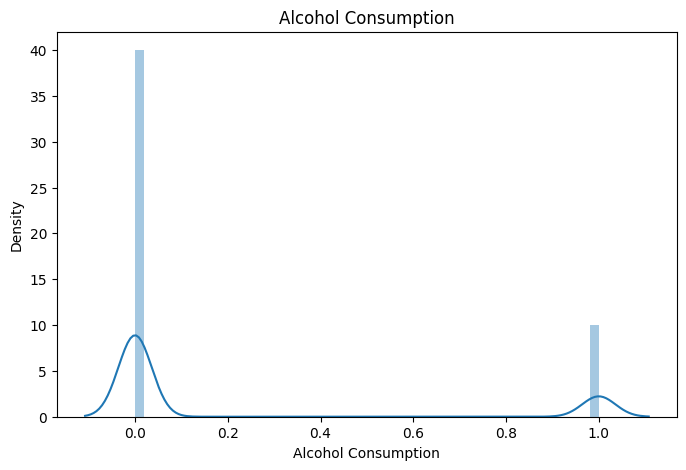

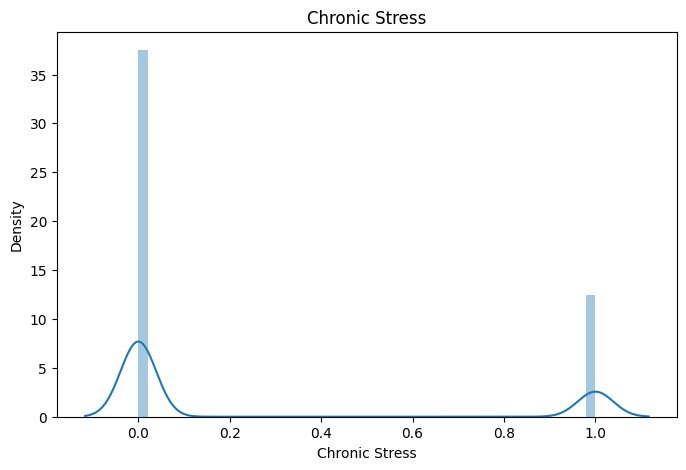

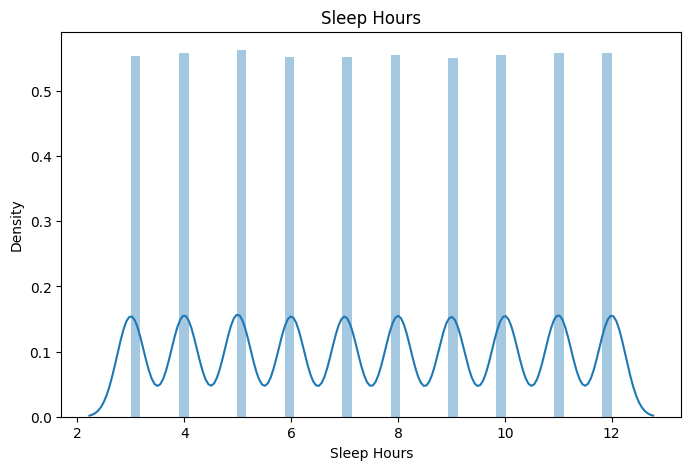

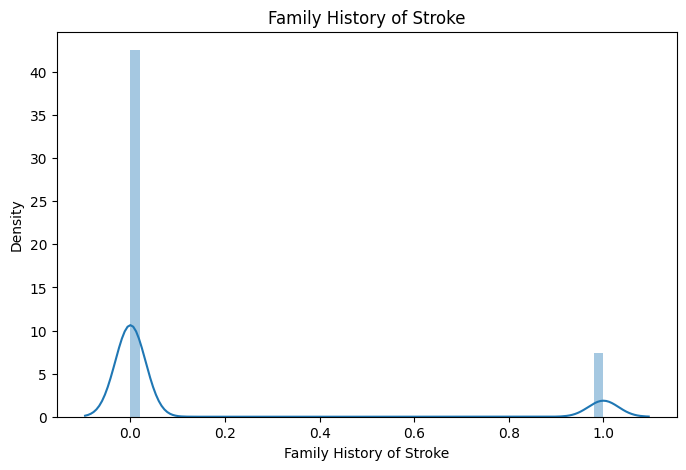

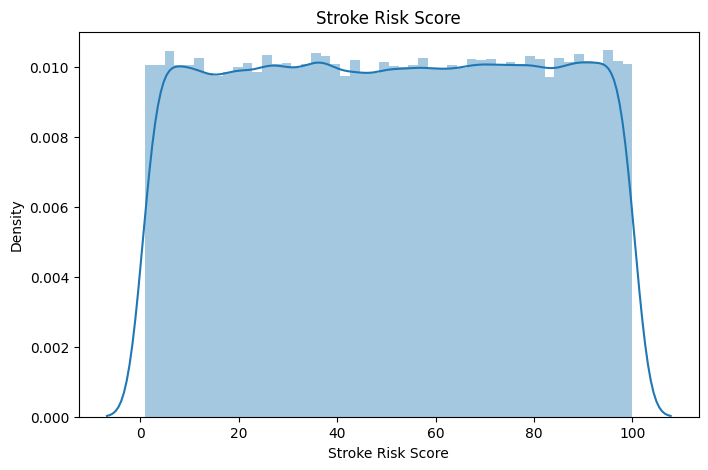

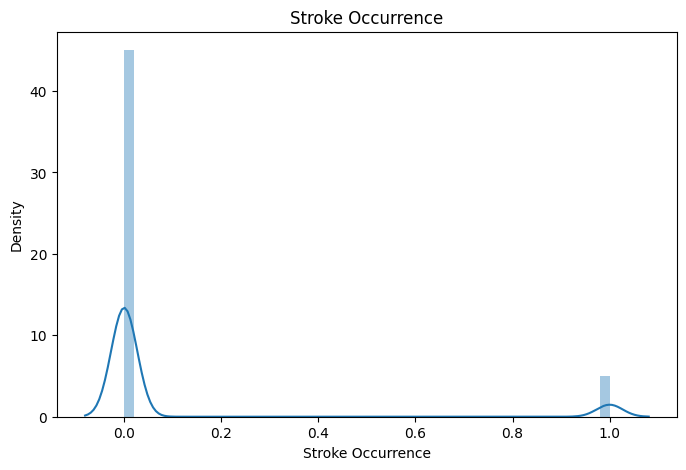

In [ ]:
#num column distribution
for col in num_col:
  plt.figure(figsize=(8,5))
  sns.distplot(df[col])
  plt.title(col)
  plt.show()

In [ ]:
#copy dataset
df2=df.copy()

In [ ]:
#drop unncessary column
df2.drop(['Income Level','Ever Married','Heart Disease','Hypertension','Family History of Stroke',
        'Residence Type','Region','Education Level','Smoking Status','Stroke Occurrence'],axis=1,inplace=True)

In [ ]:
for col in df2.columns:
  print(col)
  print(df2[col].unique())
  print('-'*50)

Age
[78 60 69 43 30 53 83 62 35 71 79 50 25 81 80 45 47 48 22 70 64 56 75 77
 24 57 86 38 54 33 52 89 85 19 34 40 36 76 44 88 59 84 87 82 46 72 66 41
 61 20 42 68 65 51 58 37 67 55 73 18 49 28 21 74 26 39 31 23 27 63 29 90
 32]
--------------------------------------------------
Gender
['Female' 'Male' 'Other']
--------------------------------------------------
Work Type
['Private' 'Never Worked' 'Government' 'Children' 'Self-employed']
--------------------------------------------------
Average Glucose Level
[267.3  207.24 161.3  ... 216.78 261.29 242.74]
--------------------------------------------------
BMI
[36.2 19.8 34.5 48.8 31.3 49.9 46.8 23.3 16.5 37.  34.3 49.5 11.4 15.2
 36.5 10.9 18.9 24.  26.6 12.6 24.1 32.8 17.2 48.9 45.3 32.5 10.  18.2
 10.6 44.3 34.7 30.2 44.8 27.3 20.6 38.  45.1 33.1 39.1 42.7 49.8 25.6
 43.5 12.3 15.7 28.7 47.9 31.6 49.4 35.5 47.1 14.6 39.2 15.9 26.2 14.
 27.4 13.5 23.8 24.6 44.4 29.8 21.3 42.9 17.4 28.2 33.8 17.1 36.  41.1
 18.  14.9 37.3 44.9 47.4 40.8

#***label Encoding:-***

In [ ]:
#check the unique values in column
for col in cate_col:
  print(col)
  print(df[col].unique())
  print('-'*50)

Gender
['Female' 'Male' 'Other']
--------------------------------------------------
Work Type
['Private' 'Never Worked' 'Government' 'Children' 'Self-employed']
--------------------------------------------------
Residence Type
['Rural' 'Urban']
--------------------------------------------------
Smoking Status
['Formerly smoked' 'Never smoked' 'Unknown' 'Smokes']
--------------------------------------------------
Physical Activity
['Sedentary' 'Light' 'Active' 'Moderate']
--------------------------------------------------
Dietary Habits
['Non-Vegetarian' 'Vegetarian' 'Mixed']
--------------------------------------------------
Education Level
['Tertiary' 'Secondary' 'No education' 'Primary']
--------------------------------------------------
Income Level
['Middle' 'High' 'Low']
--------------------------------------------------
Region
['South' 'East' 'North' 'West']
--------------------------------------------------


In [ ]:
#label encoding the categorical column
le=LabelEncoder()
for col in cate_col:
  df[col]=le.fit_transform(df[col])

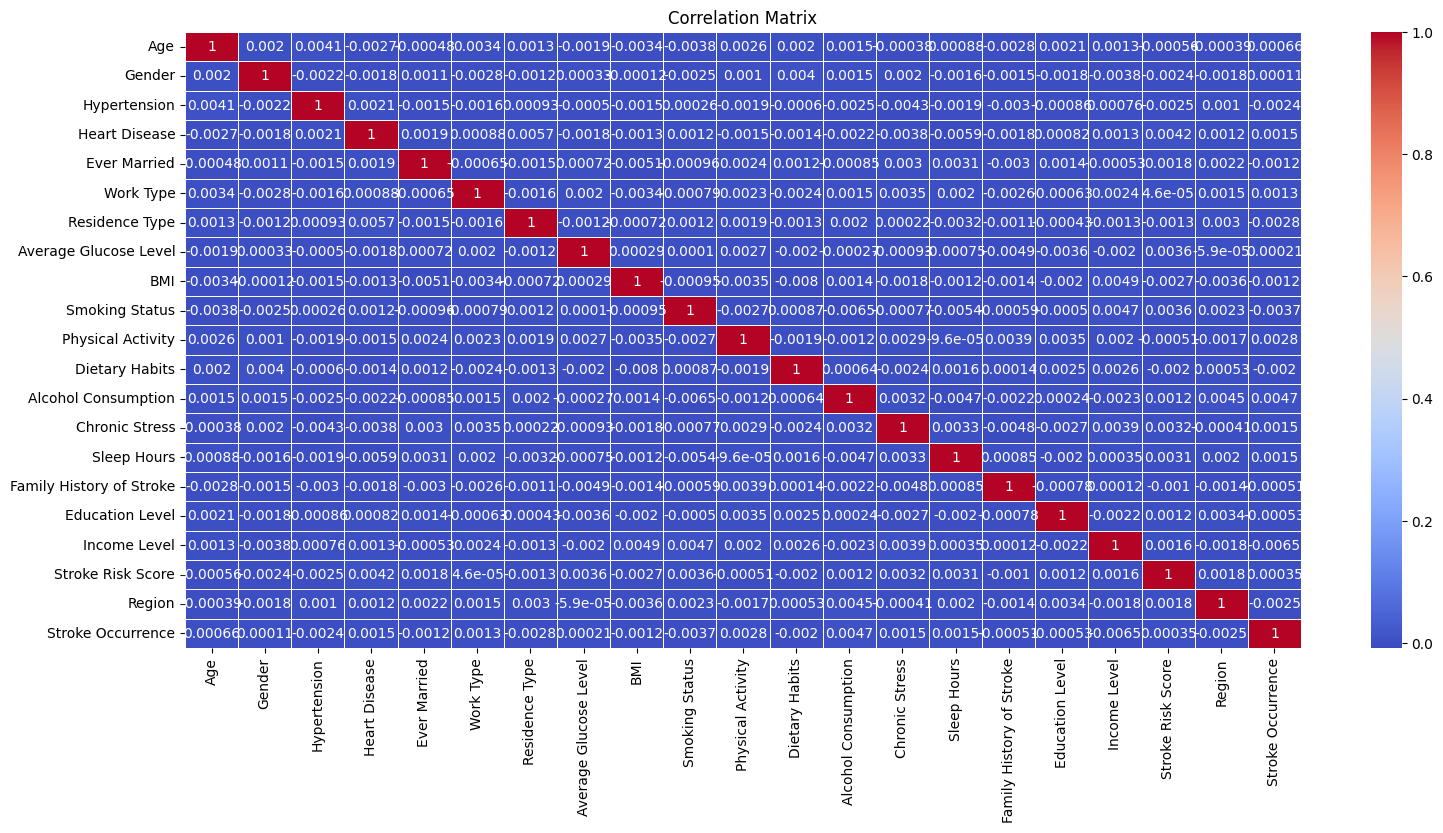

In [ ]:
# Correlation Matrix
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=.7)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

In [ ]:
corr_data=corr_matrix[['Stroke Occurrence']].sort_values(by='Stroke Occurrence', ascending=False)
corr_data

,Stroke Occurrence
Stroke Occurrence,1.000000
Alcohol Consumption,0.004707
Physical Activity,0.002819
Sleep Hours,0.001515
Chronic Stress,0.001481
Heart Disease,0.001464
Work Type,0.001259
Age,0.000662
Stroke Risk Score,0.000346
Average Glucose Level,0.000214


#***Split X,y:-***

In [ ]:
X=df.drop('Stroke Occurrence',axis=1)
y=df['Stroke Occurrence']

#***Features Selection:-***

In [ ]:
# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

Average Glucose Level       0.157109
BMI                         0.145472
Stroke Risk Score           0.126754
Age                         0.121932
Sleep Hours                 0.068508
Work Type                   0.041545
Region                      0.040270
Education Level             0.038818
Physical Activity           0.036496
Smoking Status              0.033621
Dietary Habits              0.030858
Income Level                0.027111
Gender                      0.027074
Residence Type              0.019543
Ever Married                0.017523
Chronic Stress              0.016565
Family History of Stroke    0.013706
Alcohol Consumption         0.013240
Hypertension                0.012995
Heart Disease               0.010858
dtype: float64


***Drop the column as per feature selection and correlation***

In [ ]:
X.drop(['Income Level','Ever Married','Heart Disease','Hypertension','Family History of Stroke',
        'Residence Type','Region','Education Level','Smoking Status'],axis=1,inplace=True)

#***Spliting in to Train and Test Data:-***

In [ ]:
#split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((137600, 11), (34400, 11), (137600,), (34400,))

#***Building Model:-***

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
#evaluate
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8985755813953489


#***Save The Model:-***

In [ ]:
import joblib
joblib.dump(rfc,"RFC_Model.pkl")
print("Save Model  Sucessfully")

Save Model  Sucessfully
